In [1]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
csv_data = 'high_diamond_ranked_10min.csv'
data_df = pd.read_csv(csv_data, sep=',')
data_df = data_df.drop(columns='gameId')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

## Feature Engineering 

In [4]:
features1 = data_df.columns[1:]
data_df1 = data_df.copy()
features1

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [5]:
drop_features = ['blueGoldDiff', 'redGoldDiff',
                 'blueExperienceDiff', 'redExperienceDiff',
                 'blueCSPerMin', 'redCSPerMin',
                 'blueGoldPerMin', 'redGoldPerMin', 'blueFirstBlood', 'redFirstBlood']
df = data_df.drop(columns=drop_features)
info_names = [c[3:]
              for c in df.columns if c.startswith('red')]
for info in info_names:
    df['br' + info] = df['blue' + info] - df['red' + info]
    df = df.drop(columns=['blue' + info, 'red' + info])
df[df['blueWins'] >= 1].describe()
df.describe()

,blueWins,brWardsPlaced,brWardsDestroyed,brKills,brDeaths,brAssists,brEliteMonsters,brDragons,brHeralds,brTowersDestroyed,brTotalGold,brAvgLevel,brTotalExperience,brTotalMinionsKilled,brTotalJungleMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,-0.079664,0.101731,0.046260,-0.046260,-0.017006,-0.023180,-0.051119,0.027938,0.008402,14.414111,-0.009313,-33.620306,-0.649661,-0.803421
std,0.500024,25.960582,2.854910,4.195489,4.195489,5.766787,1.067934,0.878945,0.589292,0.324835,2453.349179,0.478434,1920.370438,30.942675,14.274733
min,0.000000,-260.000000,-23.000000,-17.000000,-16.000000,-25.000000,-2.000000,-1.000000,-1.000000,-2.000000,-10830.000000,-2.600000,-9333.000000,-120.000000,-72.000000
25%,0.000000,-4.000000,-1.000000,-3.000000,-3.000000,-4.000000,-1.000000,-1.000000,0.000000,0.000000,-1585.500000,-0.400000,-1290.500000,-21.000000,-10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,-28.000000,-1.000000,0.000000
75%,1.000000,4.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1596.000000,0.200000,1212.000000,20.000000,8.000000
max,1.000000,234.000000,23.000000,16.000000,17.000000,23.000000,2.000000,1.000000,1.000000,4.000000,11467.000000,2.400000,8348.000000,127.000000,64.000000


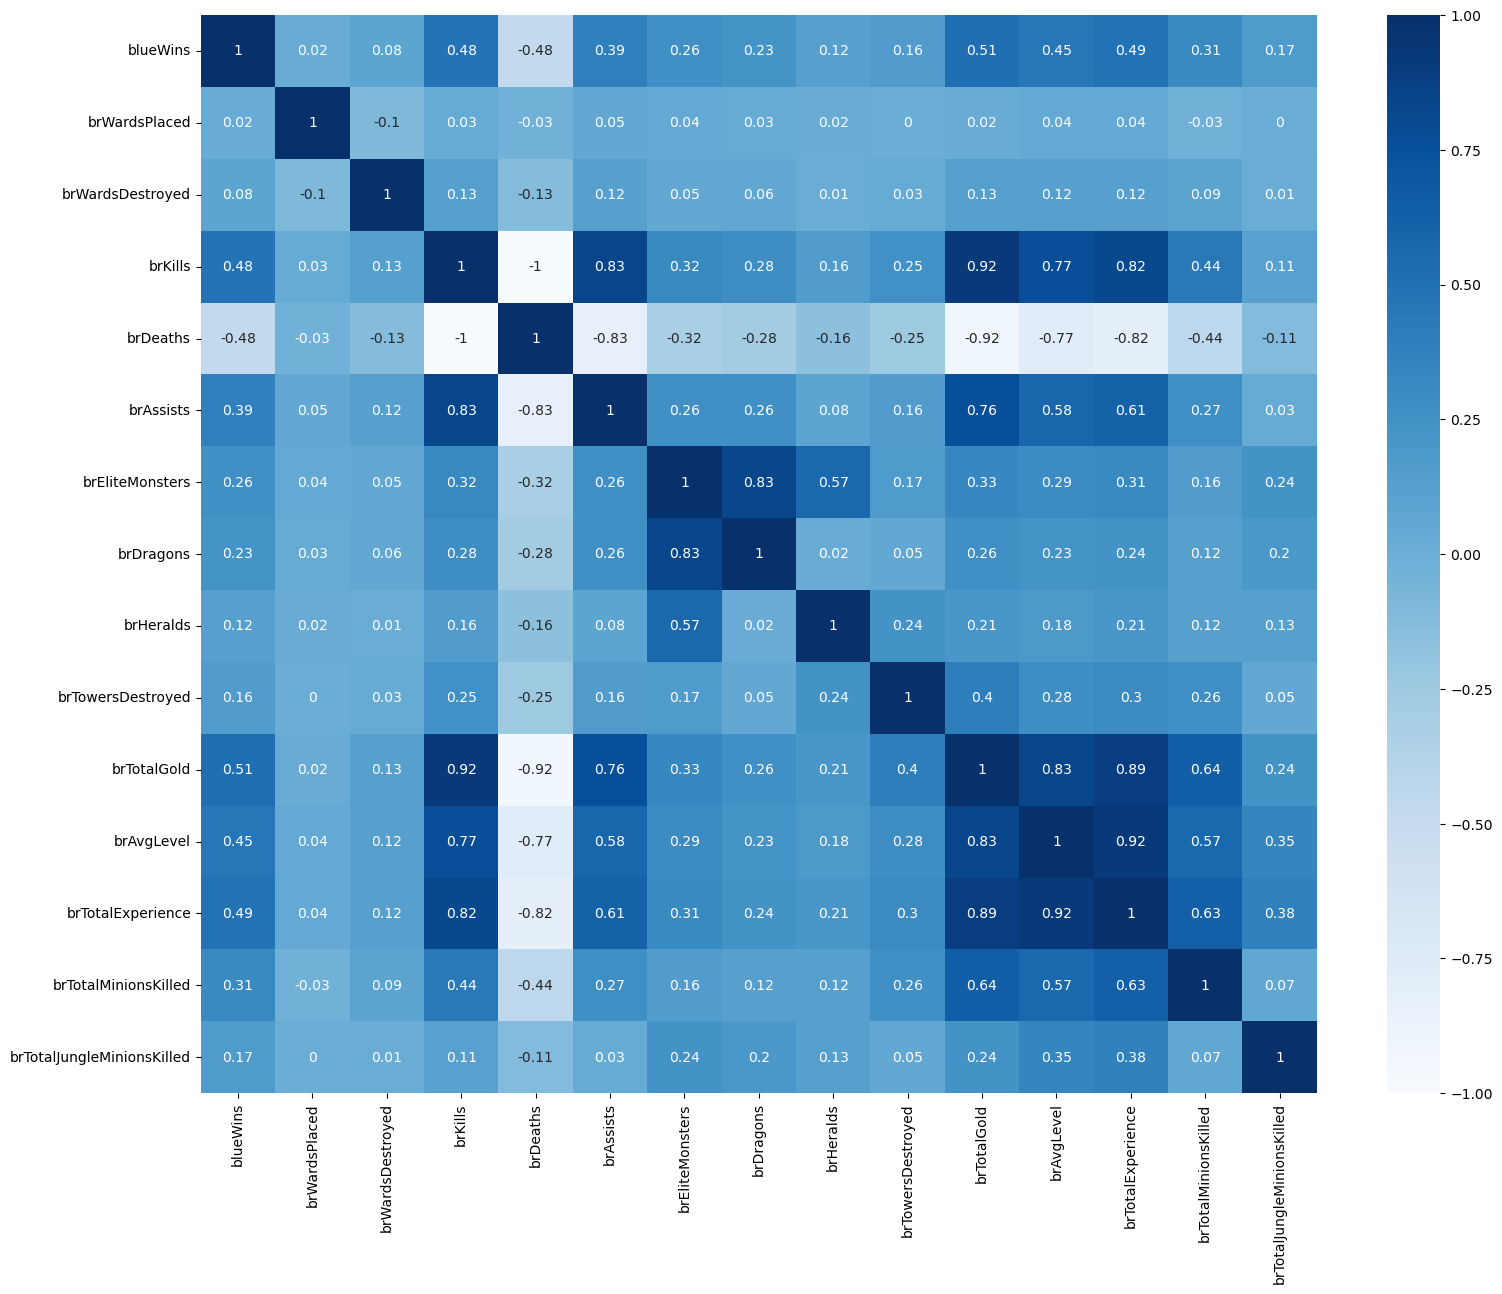

In [6]:
plt.figure(figsize=(18, 14))
sns.heatmap(round(df.corr(), 2), cmap='Blues', annot=True)
plt.show()

In [7]:
df = df.drop(columns=['brWardsDestroyed',
                      'brWardsPlaced', 'brTowersDestroyed', 'brTotalMinionsKilled', 'brHeralds'])
df.describe()

,blueWins,brKills,brDeaths,brAssists,brEliteMonsters,brDragons,brTotalGold,brAvgLevel,brTotalExperience,brTotalJungleMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,0.046260,-0.046260,-0.017006,-0.023180,-0.051119,14.414111,-0.009313,-33.620306,-0.803421
std,0.500024,4.195489,4.195489,5.766787,1.067934,0.878945,2453.349179,0.478434,1920.370438,14.274733
min,0.000000,-17.000000,-16.000000,-25.000000,-2.000000,-1.000000,-10830.000000,-2.600000,-9333.000000,-72.000000
25%,0.000000,-3.000000,-3.000000,-4.000000,-1.000000,-1.000000,-1585.500000,-0.400000,-1290.500000,-10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,-28.000000,0.000000
75%,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1596.000000,0.200000,1212.000000,8.000000
max,1.000000,16.000000,17.000000,23.000000,2.000000,1.000000,11467.000000,2.400000,8348.000000,64.000000


In [8]:
discrete_df = df.copy()

In [9]:
def discrete_fea(df, discrete_df, dis_thre=10, method='qcut'):
    for c in df.columns[1:]:
        if len(set(discrete_df[c])) <= dis_thre:
            continue

        elif method == 'cut':
            discrete_df[c] = pd.cut(df[c], dis_thre, labels=[i for i in range(dis_thre)])
        else:
            discrete_df[c] = pd.qcut(
                df[c], dis_thre, precision=0, labels=False, duplicates='drop')
    return df, discrete_df


df, discrete_df = discrete_fea(df, discrete_df, 3, 'qcut')

In [10]:
all_y = discrete_df['blueWins'].values
feature_names = discrete_df.columns[1:]
all_x = discrete_df[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=20030722)
all_y.shape, all_x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9879,), (9879, 9), (7903, 9), (1976, 9), (7903,), (1976,))

## Build Model 

In [11]:
class DecisionTree(object):
    def __init__(self, classes, features,
                 max_depth=10, min_samples_split=10,
                 impurity_t='entropy'):

        self.classes = classes
        self.features = features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.impurity_t = impurity_t
        self.root = None  # Define the root node, empty when not trained
        self.tree = defaultdict(list)


    def get_params(self, deep):
        return {'classes': self.classes, 'features': self.features,
                'max_depth': self.max_depth, 'min_samples_split': self.min_samples_split,
                'impurity_t': self.impurity_t}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def impurity(self, label):
        '''
        计算不纯度，根据传入参数计算信息熵或gini系数
        label是numpy一维数组：根据当前特征划分后的标签组成
        '''
        cnt, total = Counter(label), float(len(label))
        probs = [cnt[v] / total for v in cnt]
        if self.impurity_t == 'gini':
            return 1 - sum([p * p for p in probs])
        return -sum([p * np.log2(p) for p in probs if p > 0])

    def gain(self, feature, label) -> tuple:

        # of mixing before division, based on labels only
        p_impurity = self.impurity(label)

        # Sample subscripts corresponding to each value of the recording feature
        f_index = defaultdict(list)
        for idx, v in enumerate(feature):
            f_index[v].append(idx)

        # Based on the impurity of the feature after splitting, with the number of each value of the feature weighted by and
        c_impurity = 0
        for v in f_index:
            f_l = label[f_index[v]]
            c_impurity += self.impurity(f_l) * len(f_l) / len(label)

        # Calculate the information gain rate, i.e., the impurity when the labels are irrelevant
        # Prevent natural paranoia about features taking on more values and prevent overfitting
        r = self.impurity(feature)
        r = (p_impurity - c_impurity) / (r if r != 0 else 1)
        return r, f_index

    def expand_node(self, feature, label, depth, used_features) -> tuple:

        # 1.Recursive termination condition:
        # only one category does not need to be split or the splitting threshold is reached and the leaf node is returned.
        if len(set(label)) == 0:
            return label[0]
        most = Counter(label).most_common(1)[0][0]
        if depth > self.max_depth or len(label) < self.min_samples_split:
            return most

        # 2.Iterate over all unused features and call gain() to find the best splitting feature
        bestf, max_gain, bestf_idx = -1, -1, None
        for f in range(len(self.features)):
            if f in used_features:
                continue
            # Calculate the information gain for the feature, and the sample subscript for each value taken
            f_gain, f_idx = self.gain(feature[:, f], label)
            if bestf < 0 or f_gain > max_gain:
                bestf, max_gain, bestf_idx = f, f_gain, f_idx

        # 3.Also end the recursion if no useful split feature is found
        if bestf < 0:
            return most

        # 4.Iterate over each take of the feature and recursively call expand_node to build the tree, decision{feature take: child node}
        children = {}
        new_used_features = used_features + [bestf]
        for v in bestf_idx:
            c_idx = bestf_idx[v]
            children[v] = self.expand_node(feature[c_idx, :],
                                           label[c_idx], depth + 1, new_used_features)
        self.tree[depth].append(self.features[bestf])
        return (bestf, children, most)

    def traverse_node(self, node, feature):
        # Requires the number of input sample features to be the same as the number of features in the model definition
        assert len(self.features) == len(feature)
        # has reached the leaf node, then return the classification result
        if type(node) is not tuple:
            return node
        # Based on the feature value taken into the corresponding child node,
        # traverse_node is called recursively and node[0] records the subscript of the feature.
        fv = feature[node[0]]
        if fv in node[1]:
            return self.traverse_node(node[1][fv], feature)
        # This feature takes a value that has not appeared in the training set
        # and returns the category with the most samples that reached the current node during training
        return node[-1]

    def fit(self, feature, label):
        assert len(self.features) == len(
            feature[0])  # The number of features in the input data should be the same as the number of features in the model definition
        # Splitting from the root node, the model records the root node
        self.root = self.expand_node(
            feature, label, depth=1, used_features=[])

    def predict(self, feature):
        assert len(feature.shape) == 1 or len(feature.shape) == 2
        if len(feature.shape) == 1:
            return self.traverse_node(self.root, feature)
        return np.array([self.traverse_node(self.root, f) for f in feature])

In [12]:
DT = DecisionTree(classes=[0, 1], features=feature_names,
                  max_depth=3, min_samples_split=450, impurity_t='gini')

DT.fit(x_train, y_train)
p_test = DT.predict(x_test)
print('pred_value ', p_test)
print('true_value ', y_test)
test_acc = accuracy_score(y_test, p_test)
precision = precision_score(y_test, p_test)
recall = recall_score(y_test, p_test)
f1 = f1_score(y_test, p_test)
print('\nTREE:')
for _ in DT.tree.keys():
    print('Layer' + str(_) + ':' + str(DT.tree[_]))
print('\naccuracy: {:.4f}   precision: {:.4f}   recall: {:.4f}   f1_score: {:.4f}'.format(
    test_acc, precision, recall, f1))

pred_value  [0 1 0 ... 0 1 0]
true_value  [0 1 0 ... 0 0 1]

TREE:
Layer3:['brDragons', 'brDragons', 'brEliteMonsters', 'brKills', 'brAvgLevel', 'brAvgLevel']
Layer2:['brTotalExperience', 'brAvgLevel', 'brTotalExperience']
Layer1:['brTotalGold']

accuracy: 0.7298   precision: 0.7519   recall: 0.6915   f1_score: 0.7204


In [13]:
discrete_df1 = data_df1.copy()
data_df1, discrete_df1 = discrete_fea(data_df1, discrete_df1, 3, 'qcut')

In [14]:

all_y1 = discrete_df1['blueWins'].values
feature_names1 = features1
all_x1 = discrete_df1[feature_names1].values
x_train1, x_test1, y_train1, y_test1 = train_test_split(all_x1, all_y1, test_size=0.2, random_state=20030722)
all_y1.shape, all_x1.shape, x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((9879,), (9879, 38), (7903, 38), (1976, 38), (7903,), (1976,))

In [15]:
x_train1[:5], y_train1[:5]

(array([[0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0,
         0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
        [2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2],
        [1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1],
        [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
         2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2],
        [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,
         1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2]]),
 array([0, 0, 1, 0, 0]))

In [16]:
DT = DecisionTree(classes=[0, 1], features=features1,
                  max_depth=3, min_samples_split=450, impurity_t='gini')

DT.fit(x_train1, y_train1)
p_test1 = DT.predict(x_test1)
print('pred_value ', p_test1)
print('true_value ', y_test1)
test_acc = accuracy_score(y_test1, p_test1)
precision = precision_score(y_test1, p_test1)
recall = recall_score(y_test1, p_test1)
f1 = f1_score(y_test1, p_test1)
print('\nTREE:')
for _ in DT.tree.keys():
    print('Layer' + str(_) + ':' + str(DT.tree[_]))
print('\naccuracy: {:.4f}   precision: {:.4f}   recall: {:.4f}   f1_score: {:.4f}'.format(
    test_acc, precision, recall, f1))

pred_value  [0 1 0 ... 0 1 0]
true_value  [0 1 0 ... 0 0 1]

TREE:
Layer3:['redTowersDestroyed', 'blueExperienceDiff', 'blueTotalExperience', 'blueExperienceDiff', 'blueExperienceDiff', 'redTowersDestroyed']
Layer2:['blueDragons', 'blueDragons', 'redExperienceDiff']
Layer1:['blueGoldDiff']

accuracy: 0.7313   precision: 0.7595   recall: 0.6824   f1_score: 0.7189


In [17]:
import random

random_features = random.sample(list(features1), 20)
random_features

['redAvgLevel',
 'blueEliteMonsters',
 'redGoldDiff',
 'redDeaths',
 'blueFirstBlood',
 'blueTotalMinionsKilled',
 'redHeralds',
 'blueDeaths',
 'blueKills',
 'blueHeralds',
 'blueGoldDiff',
 'blueDragons',
 'blueWardsPlaced',
 'blueCSPerMin',
 'redTotalMinionsKilled',
 'redWardsPlaced',
 'redWardsDestroyed',
 'blueAssists',
 'blueTotalGold',
 'redTotalGold']

In [18]:
data = data_df[random_features]

In [19]:
data1 = data.copy()

In [20]:
data, data1 = discrete_fea(data, data1, 3, 'qcut')

In [21]:

all_y2 = data_df['blueWins'].values
feature_names2 = random_features
all_x2 = data1[random_features].values
x_train2, x_test2, y_train2, y_test2 = train_test_split(all_x2, all_y2, test_size=0.2, random_state=20030722)
all_y2.shape, all_x2.shape, x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape

((9879,), (9879, 20), (7903, 20), (1976, 20), (7903,), (1976,))

In [22]:
x_train2[:5], y_train2[:5]

(array([[6.8, 0. , 1. , 0. , 1. , 2. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ,
         2. , 1. , 1. , 0. , 1. , 1. , 0. ],
        [7. , 1. , 2. , 1. , 0. , 0. , 1. , 2. , 1. , 0. , 0. , 1. , 2. ,
         0. , 2. , 1. , 1. , 1. , 0. , 2. ],
        [7. , 1. , 2. , 0. , 0. , 2. , 0. , 0. , 0. , 0. , 0. , 1. , 1. ,
         2. , 2. , 2. , 1. , 0. , 0. , 1. ],
        [7.4, 0. , 2. , 0. , 0. , 1. , 1. , 2. , 0. , 0. , 0. , 0. , 0. ,
         1. , 1. , 1. , 1. , 0. , 0. , 2. ],
        [7. , 1. , 2. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0. ,
         0. , 1. , 2. , 1. , 1. , 0. , 2. ]]),
 array([0, 0, 1, 0, 0]))

In [23]:
DT = DecisionTree(classes=[0, 1], features=random_features,
                  max_depth=3, min_samples_split=450, impurity_t='gini')

DT.fit(x_train2, y_train2)
p_test2 = DT.predict(x_test2)
print('pred_value ', p_test2)
print('true_value ', y_test2)
test_acc = accuracy_score(y_test2, p_test2)
precision = precision_score(y_test2, p_test2)
recall = recall_score(y_test2, p_test2)
f1 = f1_score(y_test2, p_test2)
print('\nTREE:')
for _ in DT.tree.keys():
    print('Layer' + str(_) + ':' + str(DT.tree[_]))
print('\naccuracy: {:.4f}   precision: {:.4f}   recall: {:.4f}   f1_score: {:.4f}'.format(
    test_acc, precision, recall, f1))

pred_value  [0 1 0 ... 0 1 0]
true_value  [0 1 0 ... 0 0 1]

TREE:
Layer3:['blueTotalGold', 'redTotalGold', 'redAvgLevel', 'blueEliteMonsters', 'blueTotalGold', 'redDeaths']
Layer2:['blueDragons', 'blueDragons', 'redTotalGold']
Layer1:['redGoldDiff']

accuracy: 0.7222   precision: 0.7419   recall: 0.6874   f1_score: 0.7136


## Optimization

In [24]:
best = None
min_samples_split = 1
best_depth = 0
for impurity_t in ['entropy', 'gini']:
    accuracys = []
    for max_depth in range(1, 11):
        DT = DecisionTree(classes=[0, 1], features=feature_names,
                          max_depth=max_depth, min_samples_split=min_samples_split, impurity_t=impurity_t)
        cv_result = cross_validate(
            DT, all_x, all_y, scoring=('accuracy'), cv=5)
        test_acc = np.mean(cv_result['test_score'])
        current = (test_acc, max_depth, min_samples_split,
                   impurity_t)
        accuracys.append(current[0])
        if best is None or test_acc > best[0]:
            best = current
            best_depth = max_depth
            print('better accuracy: {:.4f}, max_depth={}, min_samples_split={}, impurity_t={}'.format(
                *best))

        else:
            print('accuracy: {:.4f}, max_depth={}, min_samples_split={}, impurity_t={}'.format(
                *current))
    print(accuracys)

better accuracy: 0.7009, max_depth=1, min_samples_split=1, impurity_t=entropy
better accuracy: 0.7127, max_depth=2, min_samples_split=1, impurity_t=entropy
better accuracy: 0.7306, max_depth=3, min_samples_split=1, impurity_t=entropy
accuracy: 0.7286, max_depth=4, min_samples_split=1, impurity_t=entropy
accuracy: 0.7243, max_depth=5, min_samples_split=1, impurity_t=entropy
accuracy: 0.7157, max_depth=6, min_samples_split=1, impurity_t=entropy
accuracy: 0.7126, max_depth=7, min_samples_split=1, impurity_t=entropy
accuracy: 0.7071, max_depth=8, min_samples_split=1, impurity_t=entropy
accuracy: 0.7024, max_depth=9, min_samples_split=1, impurity_t=entropy
accuracy: 0.7024, max_depth=10, min_samples_split=1, impurity_t=entropy
[0.7008805924255623, 0.7127237226464408, 0.7306399323527903, 0.7286156921027007, 0.7242637216214831, 0.715659509045252, 0.712622559319428, 0.7070552964690207, 0.7023993747757904, 0.7023993747757904]
accuracy: 0.7009, max_depth=1, min_samples_split=1, impurity_t=gini
a

In [25]:
best = None
max_depth = best_depth
for impurity_t in ['entropy', 'gini']:
    accuracys = []

    for min_samples_split in range(50, 800, 50):
        DT = DecisionTree(classes=[0, 1], features=feature_names,
                          max_depth=max_depth, min_samples_split=min_samples_split, impurity_t=impurity_t)
        cv_result = cross_validate(
            DT, all_x, all_y, scoring=('accuracy'), cv=5)
        test_acc = np.mean(cv_result['test_score'])
        current = (test_acc, max_depth, min_samples_split,
                   impurity_t)
        accuracys.append(current[0])
        if best is None or test_acc > best[0]:
            best = current
            print('better accuracy: {:.4f}, max_depth={}, min_samples_split={}, impurity_t={}'.format(
                *best))

        else:
            print('accuracy: {:.4f}, max_depth={}, min_samples_split={}, impurity_t={}'.format(
                *current))
    print(accuracys)

better accuracy: 0.7306, max_depth=3, min_samples_split=50, impurity_t=entropy
accuracy: 0.7306, max_depth=3, min_samples_split=100, impurity_t=entropy
accuracy: 0.7306, max_depth=3, min_samples_split=150, impurity_t=entropy
accuracy: 0.7305, max_depth=3, min_samples_split=200, impurity_t=entropy
accuracy: 0.7305, max_depth=3, min_samples_split=250, impurity_t=entropy
accuracy: 0.7305, max_depth=3, min_samples_split=300, impurity_t=entropy
accuracy: 0.7305, max_depth=3, min_samples_split=350, impurity_t=entropy
accuracy: 0.7305, max_depth=3, min_samples_split=400, impurity_t=entropy
better accuracy: 0.7307, max_depth=3, min_samples_split=450, impurity_t=entropy
accuracy: 0.7307, max_depth=3, min_samples_split=500, impurity_t=entropy
accuracy: 0.7298, max_depth=3, min_samples_split=550, impurity_t=entropy
accuracy: 0.7298, max_depth=3, min_samples_split=600, impurity_t=entropy
accuracy: 0.7298, max_depth=3, min_samples_split=650, impurity_t=entropy
accuracy: 0.7298, max_depth=3, min_sam

Text(0, 0.5, 'accurancy')

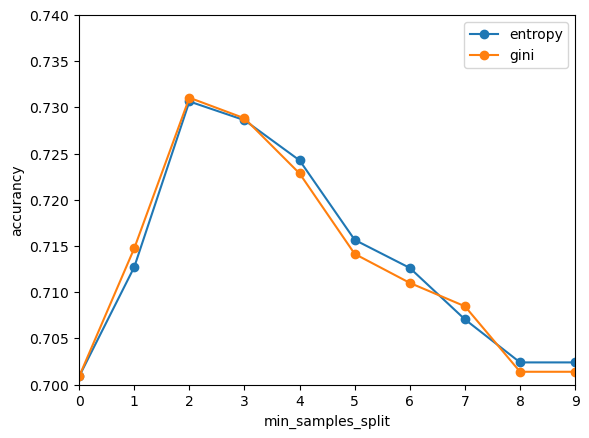

In [26]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

y_1 = [0.7008805924255623, 0.7127237226464408, 0.7306399323527903, 0.7286156921027007, 0.7242637216214831,
       0.715659509045252, 0.712622559319428, 0.7070552964690207, 0.7023993747757904, 0.7023993747757904]
x = range(len(y_1))
y_2 = [0.7008805924255623, 0.714749039102137, 0.7310449956439297, 0.7288182749961565, 0.7228465638292421,
       0.7141406241992517, 0.7110029723773894, 0.7084719930302874, 0.7013867165479424, 0.7013867165479424]

plt.ylim(0.70, 0.74)

plt.plot(x, y_1, marker='o', label='entropy')
plt.plot(x, y_2, marker='o', label='gini')
plt.legend()

plt.margins(0)
plt.xlabel('min_samples_split')
plt.ylabel("accurancy")


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

parameters = {
    'splitter': ('best', 'random'),
    'criterion': ('gini', 'entropy'),
    'max_depth': [*range(1, 20, 2)],
}

clf = DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(x_train, y_train)
GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'splitter': ('best', 'random')})
print("best score: ", GS.best_score_)
print("best param: ", GS.best_params_)

best score:  0.7263081502344413
best param:  {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}


In [28]:

best_clf = DecisionTreeClassifier(
    criterion="gini", max_depth=7, splitter="best")
best_clf.fit(x_train, y_train)
print("score:", best_clf.score(x_test, y_test))

y_pred = best_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification report : \n', cr)

score: 0.7241902834008097
Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       981
           1       0.73      0.72      0.72       995

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

